<a href="https://colab.research.google.com/github/b-akash-krishna/Internpe_AIML_Internship/blob/main/Project_3_Diabetes_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [224]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [225]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [226]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 📊 Exploratory Data Visualizations
These plots show how key features differ between diabetic and non-diabetic patients.

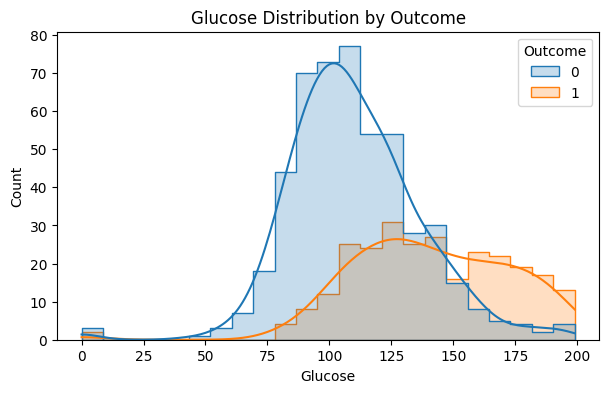

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

# Glucose distribution by diabetes outcome
plt.figure(figsize=(7,4))
sns.histplot(data=diabetes_dataset, x='Glucose', hue='Outcome', kde=True, element='step')
plt.title('Glucose Distribution by Outcome')
plt.show()

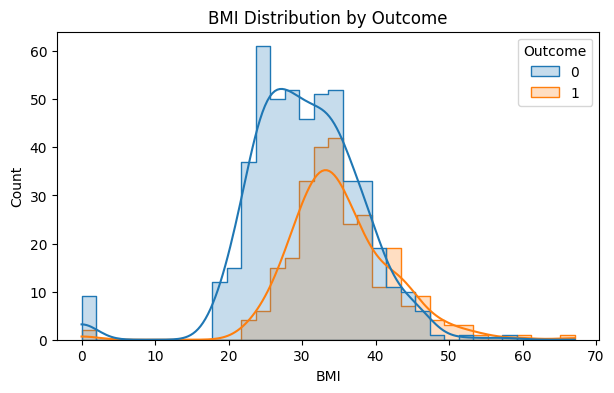

In [228]:
# BMI distribution by diabetes outcome
plt.figure(figsize=(7,4))
sns.histplot(data=diabetes_dataset, x='BMI', hue='Outcome', kde=True, element='step')
plt.title('BMI Distribution by Outcome')
plt.show()

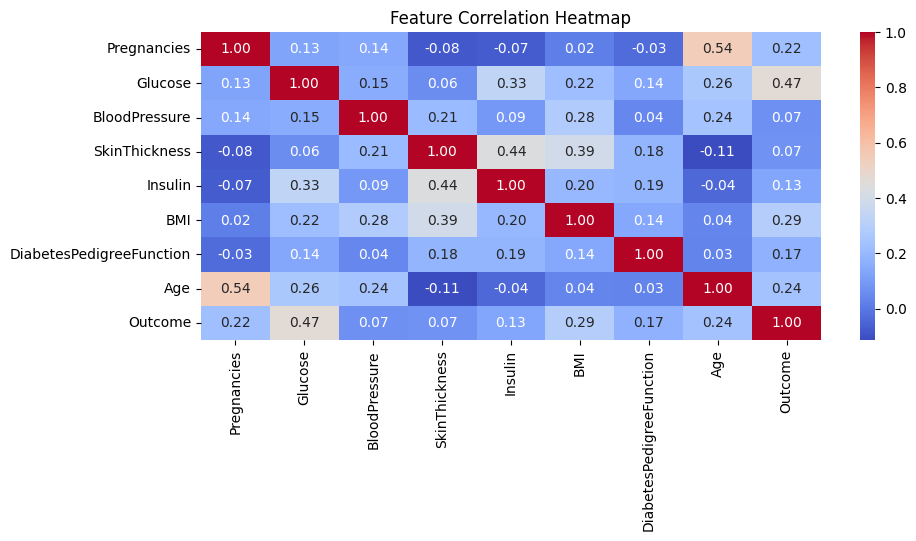

In [229]:
# Correlation heatmap
plt.figure(figsize=(10,4))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [230]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [231]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [232]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> Non-Diabetic

1 --> Diabetic

In [233]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [234]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome')
Y = diabetes_dataset['Outcome']

In [235]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [236]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [237]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [238]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [239]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

classifier = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="linear", probability=True))
])

classifier.fit(X_train, Y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(kernel='linear', probability=True))])

Model Evaluation - *Accuracy Score*

In [240]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [241]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [242]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [243]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a Predictive System

In [244]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[0]
The person is not diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## ✅ Model Evaluation Visualizations
We evaluate model performance with a confusion matrix and ROC curve.

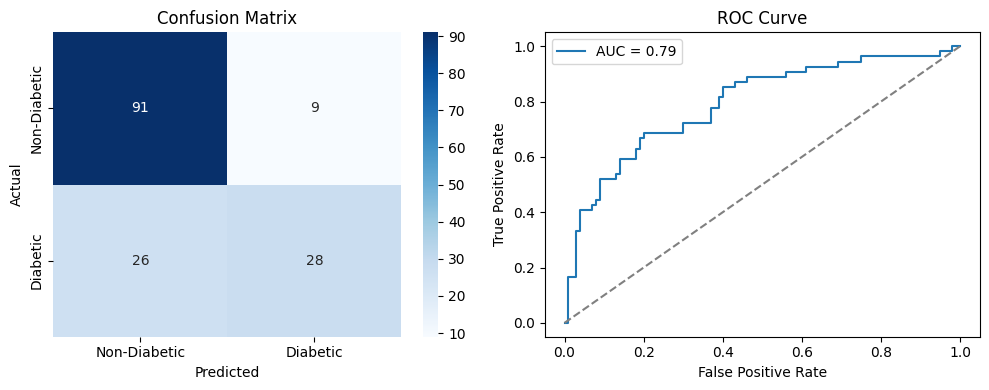

In [245]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = classifier.predict(X_test)

# --- Confusion Matrix ---
cm = confusion_matrix(Y_test, y_pred)

# --- ROC Curve ---
y_scores = classifier.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(Y_test, y_scores)
auc_score = roc_auc_score(Y_test, y_scores)


fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic','Diabetic'],
            yticklabels=['Non-Diabetic','Diabetic'],
            ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix')

# ROC Curve
axes[1].plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
axes[1].plot([0,1],[0,1],'--', color='gray')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()

plt.tight_layout()
plt.show()


## 🔮 Diabetes Prediction Helper
This function allows prediction for a user input.

In [246]:
import pandas as pd

# Define feature names in the correct order
feature_names = [
    'Pregnancies','Glucose','BloodPressure','SkinThickness',
    'Insulin','BMI','DiabetesPedigreeFunction','Age'
]

def predict_diabetes(input_data, model):
    """
    Predict diabetes outcome for a single patient.

    Parameters
    ----------
    input_data : tuple or list
        8 medical feature values in the correct order
    model : sklearn pipeline
        trained model (SVM pipeline here)

    Returns
    -------
    str : 'Diabetic' or 'Non-Diabetic'
    """
    df = pd.DataFrame([input_data], columns=feature_names)
    prediction = model.predict(df)[0]
    return 'DIABETIC' if prediction == 1 else 'NON-DIABETIC'

Example usage

In [254]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

example_patients = [
    (5,166,72,19,175,25.8,0.587,51),
    (2,120,70,30,85,33.2,0.45,29),
    (7,195,80,25,0,30.1,0.65,47),
    (0,85,66,29,0,26.6,0.351,31),
]

results = []
for patient in example_patients:
    result = predict_diabetes(patient, classifier)
    results.append(list(patient) + [result])

report = pd.DataFrame(results, columns=feature_names + ["Prediction"])
print("🧾 Patients Report (Predefined Examples):")
display(report)


# --- User Input ---
inputs = {}
for feature in feature_names:
    inputs[feature] = widgets.FloatText(
        description=feature,
        layout=widgets.Layout(width="300px")
    )

# Button for prediction
button = widgets.Button(
    description="🔮 Predict Diabetes",
    button_style="success",
    layout=widgets.Layout(width="300px")
)

output = widgets.Output()

# Define button click event
def on_button_click(b):
    with output:
        clear_output()
        # Collect values in the correct order
        user_input = [inputs[f].value for f in feature_names]
        result = predict_diabetes(user_input, classifier)

        # Show report as DataFrame
        user_report = pd.DataFrame([user_input + [result]],
                                   columns=feature_names + ["Prediction"])
        print("\n 🧾 Patient Report (User Input):")
        display(user_report)

        # Friendly summary
        if result == "DIABETIC":
            print("\n 🚨 Based on the entered values, the patient is **DIABETIC**")
        else:
            print("\n ✅ Based on the entered values, the patient is **NON-DIABETIC**")

# Bind button action
button.on_click(on_button_click)

# Display input fields + button + output
print("\n🔹 Enter patient details below:")
for f in feature_names:
    display(inputs[f])
display(button, output)

🧾 Patients Report (Predefined Examples):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Prediction
0,5,166,72,19,175,25.8,0.587,51,DIABETIC
1,2,120,70,30,85,33.2,0.450,29,NON-DIABETIC
2,7,195,80,25,0,30.1,0.650,47,DIABETIC
3,0,85,66,29,0,26.6,0.351,31,NON-DIABETIC



🔹 Enter patient details below:


FloatText(value=0.0, description='Pregnancies', layout=Layout(width='300px'))

FloatText(value=0.0, description='Glucose', layout=Layout(width='300px'))

FloatText(value=0.0, description='BloodPressure', layout=Layout(width='300px'))

FloatText(value=0.0, description='SkinThickness', layout=Layout(width='300px'))

FloatText(value=0.0, description='Insulin', layout=Layout(width='300px'))

FloatText(value=0.0, description='BMI', layout=Layout(width='300px'))

FloatText(value=0.0, description='DiabetesPedigreeFunction', layout=Layout(width='300px'))

FloatText(value=0.0, description='Age', layout=Layout(width='300px'))

Button(button_style='success', description='🔮 Predict Diabetes', layout=Layout(width='300px'), style=ButtonSty…

Output()